In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

iris = datasets.load_iris()

# 对数据集进行探索
# 打印数据集特征
print("特征名：" + str(iris.feature_names))

# 探索一个样本数据，每行数据4列，分别表示上述4种特征
print("第一行样本：" + str(iris.data[:1]))

# 第一个样本属于哪个品种，用数字代号表示
print("第一行样本所属品种：" + str(iris.target[:1]))

特征名：['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
第一行样本：[[5.1 3.5 1.4 0.2]]
第一行样本所属品种：[0]


Text(0, 0.5, 'Sepal Width')

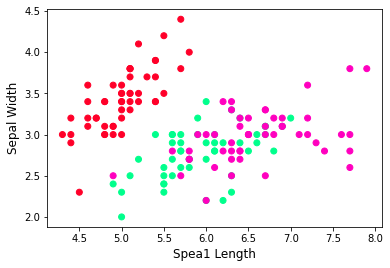

In [2]:
# 查看前两列数据，即花萼的长度和宽度
X = iris.data[:, :3]
y = iris.target

# 将数据集中所有数据进行二维可视化展示
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=12)
plt.ylabel('Sepal Width', fontsize=12)

C:\Users\zhouz\AppData\Local\Temp/ipykernel_22076/1188459371.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


[Text(-0.8, 0, ''),
 Text(-0.6000000000000001, 0, ''),
 Text(-0.4, 0, ''),
 Text(-0.19999999999999996, 0, ''),
 Text(0.0, 0, ''),
 Text(0.19999999999999996, 0, ''),
 Text(0.40000000000000013, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, '')]

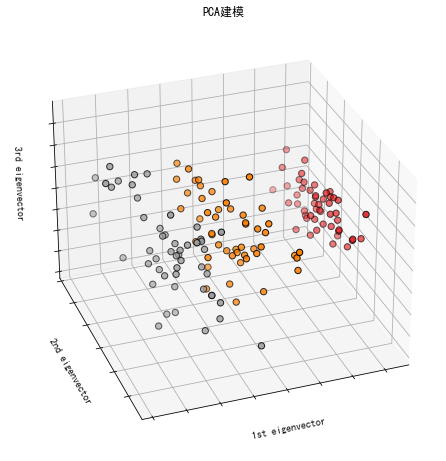

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("PCA建模")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
# plt.savefig('../../期末作业/figures/PCA.png', dpi=900)

In [4]:
# 对数据集使用K-Means进行聚类
km = KMeans(n_clusters = 3)
km.fit(X)

# 打印聚类后各个簇的中心点
centers = km.cluster_centers_
print(centers)

[[6.83571429 3.06428571 5.6547619 ]
 [5.006      3.428      1.462     ]
 [5.84655172 2.73275862 4.3637931 ]]


Text(0.5, 1.0, 'Predicted')

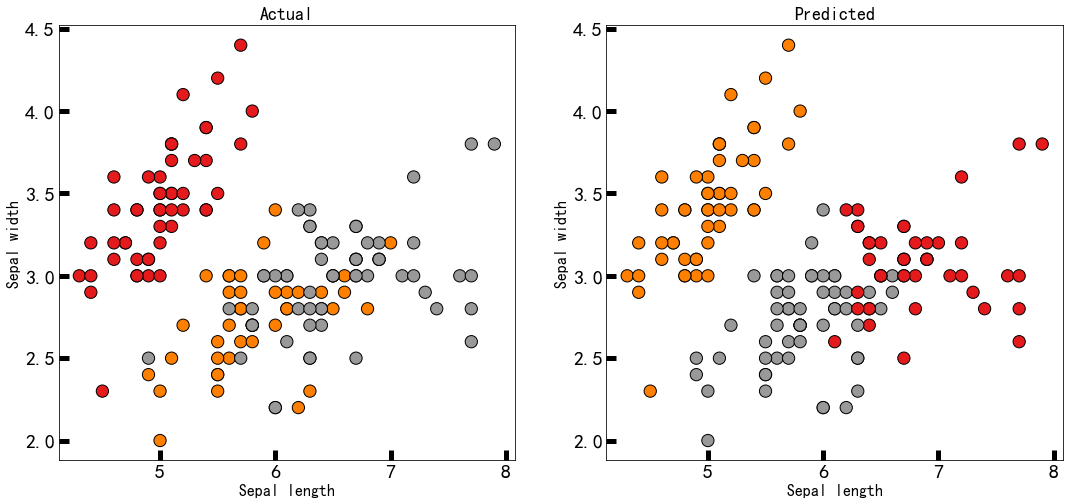

In [5]:
predicted_labels = km.labels_

fig, axes = plt.subplots(1, 2, figsize=(18,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, 
                edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap=plt.cm.Set1,
                edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=16)
axes[0].set_ylabel('Sepal width', fontsize=16)
axes[1].set_xlabel('Sepal length', fontsize=16)
axes[1].set_ylabel('Sepal width', fontsize=16)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)